# Principle Component Analysis (PCA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
# constants

PATH = '../data/all_seasons.csv' # https://www.kaggle.com/justinas/nba-players-data


## Import Data

In [7]:
df = pd.read_csv(PATH).drop(columns = ['Unnamed: 0'])
print(df.shape)

(11700, 21)


In [10]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


## EDA

In [37]:
def single_col_avg_viz_fn(df, c1, avg_col, title):
    plt.clf()
    res = df.groupby([c1])[avg_col].mean().reset_index()
    res.plot(x = c1, y = avg_col, kind = 'line')
    plt.title(title)
    plt.show()
    return res

<Figure size 432x288 with 0 Axes>

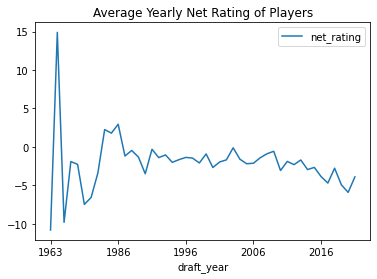

In [38]:
_ = single_col_avg_viz_fn(df = df, c1 = 'draft_year', avg_col = 'net_rating', title = 'Average Yearly Net Rating of Players')

<Figure size 432x288 with 0 Axes>

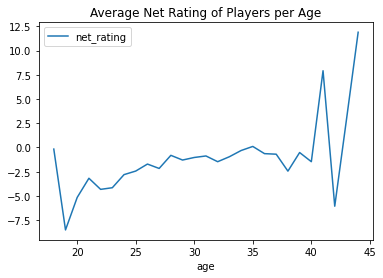

In [39]:
_ = single_col_avg_viz_fn(df = df, c1 = 'age', avg_col = 'net_rating', title = 'Average Net Rating of Players per Age')

<Figure size 432x288 with 0 Axes>

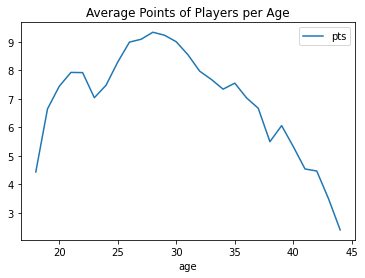

In [40]:
_ = single_col_avg_viz_fn(df = df, c1 = 'age', avg_col = 'pts', title = 'Average Points of Players per Age')

<Figure size 432x288 with 0 Axes>

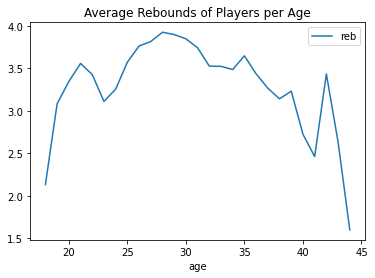

In [41]:
_ = single_col_avg_viz_fn(df = df, c1 = 'age', avg_col = 'reb', title = 'Average Rebounds of Players per Age')

<Figure size 432x288 with 0 Axes>

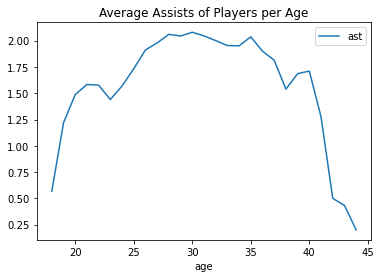

In [42]:
_ = single_col_avg_viz_fn(df = df, c1 = 'age', avg_col = 'ast', title = 'Average Assists of Players per Age')

In [43]:
df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [44]:
df[df['draft_year'] == 'Undrafted'].sort_values(by = 'pts', ascending = False).head(20)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
11411,Christian Wood,HOU,25.0,208.28,97.068688,UNLV,USA,Undrafted,Undrafted,Undrafted,...,21.0,9.6,1.7,-3.8,0.055,0.228,0.255,0.591,0.089,2020-21
4406,Mike James,TOR,31.0,187.96,86.182480,Duquesne,USA,Undrafted,Undrafted,Undrafted,...,20.3,3.3,5.8,-2.3,0.018,0.095,0.250,0.583,0.276,2005-06
10602,JaKarr Sampson,CHI,26.0,205.74,97.522280,"St. John's, N.Y.",USA,Undrafted,Undrafted,Undrafted,...,20.0,8.0,1.0,-2.3,0.037,0.196,0.234,0.633,0.052,2018-19
11170,Fred VanVleet,TOR,27.0,185.42,89.357624,Wichita State,USA,Undrafted,Undrafted,Undrafted,...,19.6,4.2,6.3,3.3,0.016,0.101,0.237,0.534,0.264,2020-21
9656,Jeremy Lin,BKN,29.0,190.50,90.718400,Harvard,USA,Undrafted,Undrafted,Undrafted,...,18.0,0.0,4.0,-9.5,0.000,0.000,0.254,0.597,0.235,2017-18
10631,Fred VanVleet,TOR,26.0,185.42,89.357624,Wichita State,USA,Undrafted,Undrafted,Undrafted,...,17.6,3.8,6.6,4.8,0.009,0.088,0.218,0.553,0.281,2019-20
2143,David Wesley,CHH,30.0,185.42,95.707912,Baylor,USA,Undrafted,Undrafted,Undrafted,...,17.2,2.7,4.4,2.6,0.023,0.059,0.230,0.509,0.214,2000-01
250,David Wesley,BOS,26.0,185.42,89.811216,Baylor,USA,Undrafted,Undrafted,Undrafted,...,16.8,3.6,7.3,-7.4,0.024,0.084,0.189,0.563,0.286,1996-97
2960,David Wesley,NOH,32.0,185.42,92.079176,Baylor,USA,Undrafted,Undrafted,Undrafted,...,16.7,2.4,3.4,2.4,0.016,0.060,0.213,0.533,0.159,2002-03
7703,Wesley Matthews,POR,27.0,195.58,99.790240,Marquette,USA,Undrafted,Undrafted,Undrafted,...,16.4,3.5,2.4,4.9,0.020,0.090,0.196,0.588,0.109,2013-14


## Preprocess Data

## Dimensionality Reduction

In [50]:
num_feats = list(df._get_numeric_data().columns)

## Visualize